In [89]:
# Run the gizmo_installation.ipynb notebook in FIRE/ prior to running this notebook.
# ! bash FIRE/gizmo_analysis/install_helper.sh

In [2]:
import gizmo_analysis as gizmo  # rename these packages for brevity
import utilities as ut  # rename these packages for brevity

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

from astropy import units as u
from astropy import constants as cst

from aqn import *
from constants import *

Loaded constants script
Loaded AQN script


In [3]:
simulation_directory = 'FIRE/m12i_res7100'
part = gizmo.io.Read.read_snapshots('all', 'redshift', 0, simulation_directory)


# in utilities.simulation.Snapshot():
* reading:  FIRE/m12i_res7100/snapshot_times.txt

* input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  FIRE/m12i_res7100/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 57060074 particles
    star      (id = 4): 13976485 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['dark', 'dark2', 'gas', 'star']

* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5

* reading cosmological parameters from:  FIRE/m12i_res7100/initial_condition/ic_agora_m12i.conf

* checking sanity of particle properties

  cannot read file containing hosts coordinates
  instead will assign hosts via iterative zoom on particle mass

# in utilities.p

In [4]:
# filter by distance to Galaxy
max_distance_kpc = 5 * u.kpc
within_mw = part['dark'].prop('host.distance.total') < max_distance_kpc.value

# array of distances of each particle to the host Galaxy centre
dm = part['dark'].prop('host.distance.total')[within_mw]

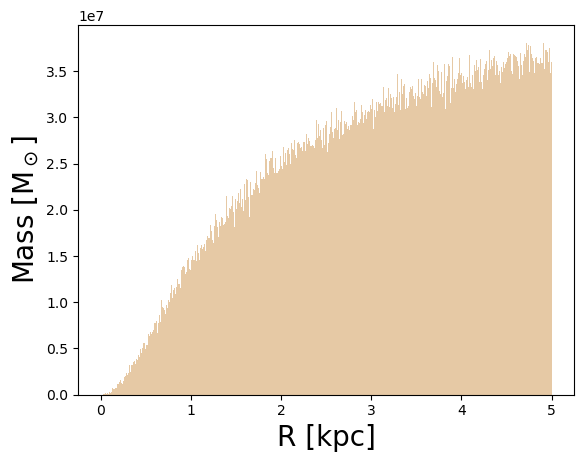

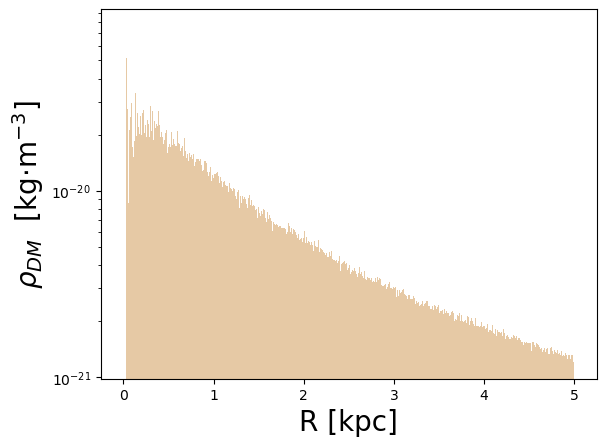

In [5]:
num_bins = 800

# create bins array
distance_bins = np.linspace(0,max_distance_kpc.value,num_bins+1,endpoint=True) * u.kpc

# normalize bins
kpc_per_bin = max_distance_kpc / num_bins

# calculate spherical areas at each binned distance
avg_bin_distances = distance_bins[0:len(distance_bins)-1] + kpc_per_bin/2
avg_bin_areas = 4 * np.pi * avg_bin_distances**2

# bin weighing by particle mass
plt.figure(dpi=100)
histogram_results = plt.hist(dm, bins=distance_bins.value, 
                                 weights=part['dark']['mass'][within_mw], color="burlywood", alpha = 0.75)
plt.xlabel("R [kpc]", size=20)
plt.ylabel("Mass [M$_\odot$]", size=20)
# plt.savefig("plots/m12i dm mass.png", bbox_inches='tight')
# plt.savefig("plots/m12i dm mass.svg", bbox_inches='tight')
plt.show()

binned_dm_density = histogram_results[0] * u.Msun / avg_bin_areas / kpc_per_bin
binned_dm_density_si = binned_dm_density.to(u.kg/u.m**3)

plt.figure(dpi=100)
plt.bar(avg_bin_distances.value, binned_dm_density_si.value, width=kpc_per_bin.value, color="burlywood", alpha = 0.75)
plt.yscale('log')
plt.xlabel("R [kpc]", size=20)
plt.ylabel(r'$\rho_{DM}$'+"  [kg$\cdot$m$^{-3}$]", size = 20)
# plt.savefig("plots/m12i dm density.png", bbox_inches='tight')
# plt.savefig("plots/m12i dm density.svg", bbox_inches='tight')
plt.show()

# plt.hist(avg_bin_distances.value, bins=distance_bins.value, weights = binned_dm_density_si.value)
# plt.show()


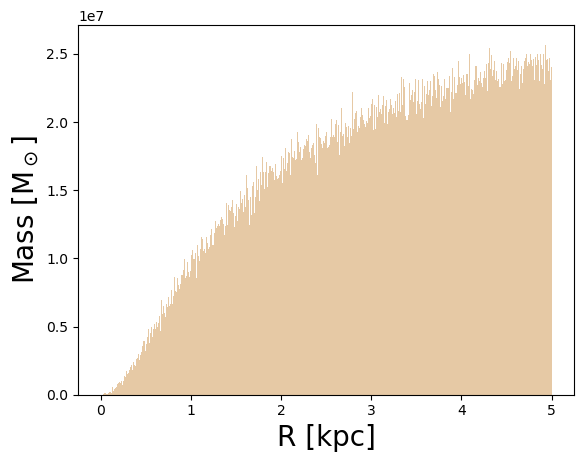

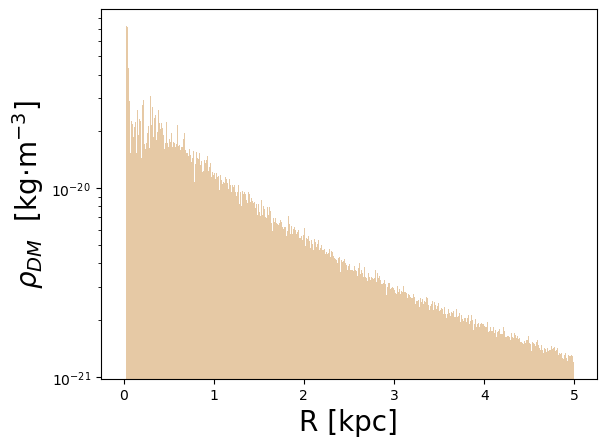

In [8]:
# filter by distance to Galaxy
max_distance_kpc = 5 * u.kpc
within_mw = part['dark'].prop('host.distance.total') < max_distance_kpc.value

# array of distances of each particle to the host Galaxy centre
dm = part['dark'].prop('host.distance.total')[within_mw]

num_bins = 1200

# create bins array
distance_bins = np.linspace(0,max_distance_kpc.value,num_bins+1,endpoint=True) * u.kpc

# normalize bins
kpc_per_bin = max_distance_kpc / num_bins

# calculate spherical areas at each binned distance
avg_bin_distances = distance_bins[0:len(distance_bins)-1] + kpc_per_bin/2
avg_bin_areas = 4 * np.pi * avg_bin_distances**2

bin_volumes = 4/3*np.pi * (distance_bins[1:len(distance_bins)]**3 - distance_bins[0:len(distance_bins) - 1]**3)

# bin weighing by particle mass
plt.figure(dpi=100)
histogram_results = plt.hist(dm, bins=distance_bins.value, 
                                 weights=part['dark']['mass'][within_mw], color="burlywood", alpha = 0.75)
plt.xlabel("R [kpc]", size=20)
plt.ylabel("Mass [M$_\odot$]", size=20)
# plt.savefig("plots/m12i dm mass.png", bbox_inches='tight')
# plt.savefig("plots/m12i dm mass.svg", bbox_inches='tight')
plt.show()

binned_dm_density = histogram_results[0] * u.Msun / bin_volumes
binned_dm_density_si = binned_dm_density.to(u.kg/u.m**3)

plt.figure(dpi=100)
plt.bar(distance_bins[0:len(distance_bins) - 1].value, binned_dm_density_si.value, width=kpc_per_bin ,color="burlywood", alpha = 0.75)
plt.yscale('log')
plt.xlabel("R [kpc]", size=20)
plt.ylabel(r'$\rho_{DM}$'+"  [kg$\cdot$m$^{-3}$]", size = 20)
# plt.savefig("plots/m12i dm density.png", bbox_inches='tight')
# plt.savefig("plots/m12i dm density.svg", bbox_inches='tight')
plt.show()

# plt.hist(avg_bin_distances.value, bins=distance_bins.value, weights = binned_dm_density_si.value)
# plt.show()


In [9]:
kpc_per_bin

<Quantity 0.00416667 kpc>

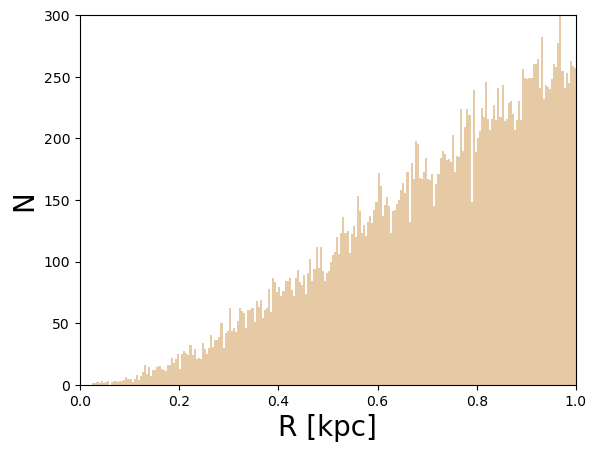

0.004166666666666667 kpc


In [165]:
# bin weighing by particle mass
plt.figure(dpi=100)
histogram_results = plt.hist(dm, bins=distance_bins.value, color="burlywood", alpha = 0.75)

plt.xlabel("R [kpc]", size=20)
plt.ylabel("N", size=20)
# plt.savefig("plots/m12i dm mass.png", bbox_inches='tight')
# plt.savefig("plots/m12i dm mass.svg", bbox_inches='tight')
plt.xlim([0,1])
plt.ylim([0,300])
plt.show()

print(max_distance_kpc / num_bins)


[]

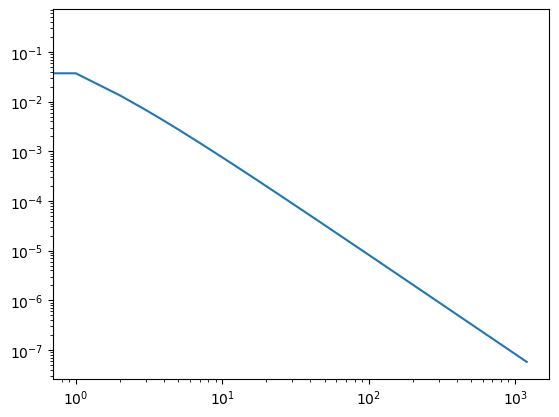

In [157]:
# Plot showing the difference between two methods of calculating binned volume
bin_volumes = 4/3*np.pi * (distance_bins[1:len(distance_bins)]**3 - distance_bins[0:len(distance_bins) - 1]**3)
bin_volumes_old = avg_bin_areas * kpc_per_bin

plt.plot(bin_volumes/bin_volumes_old -1)
plt.loglog()

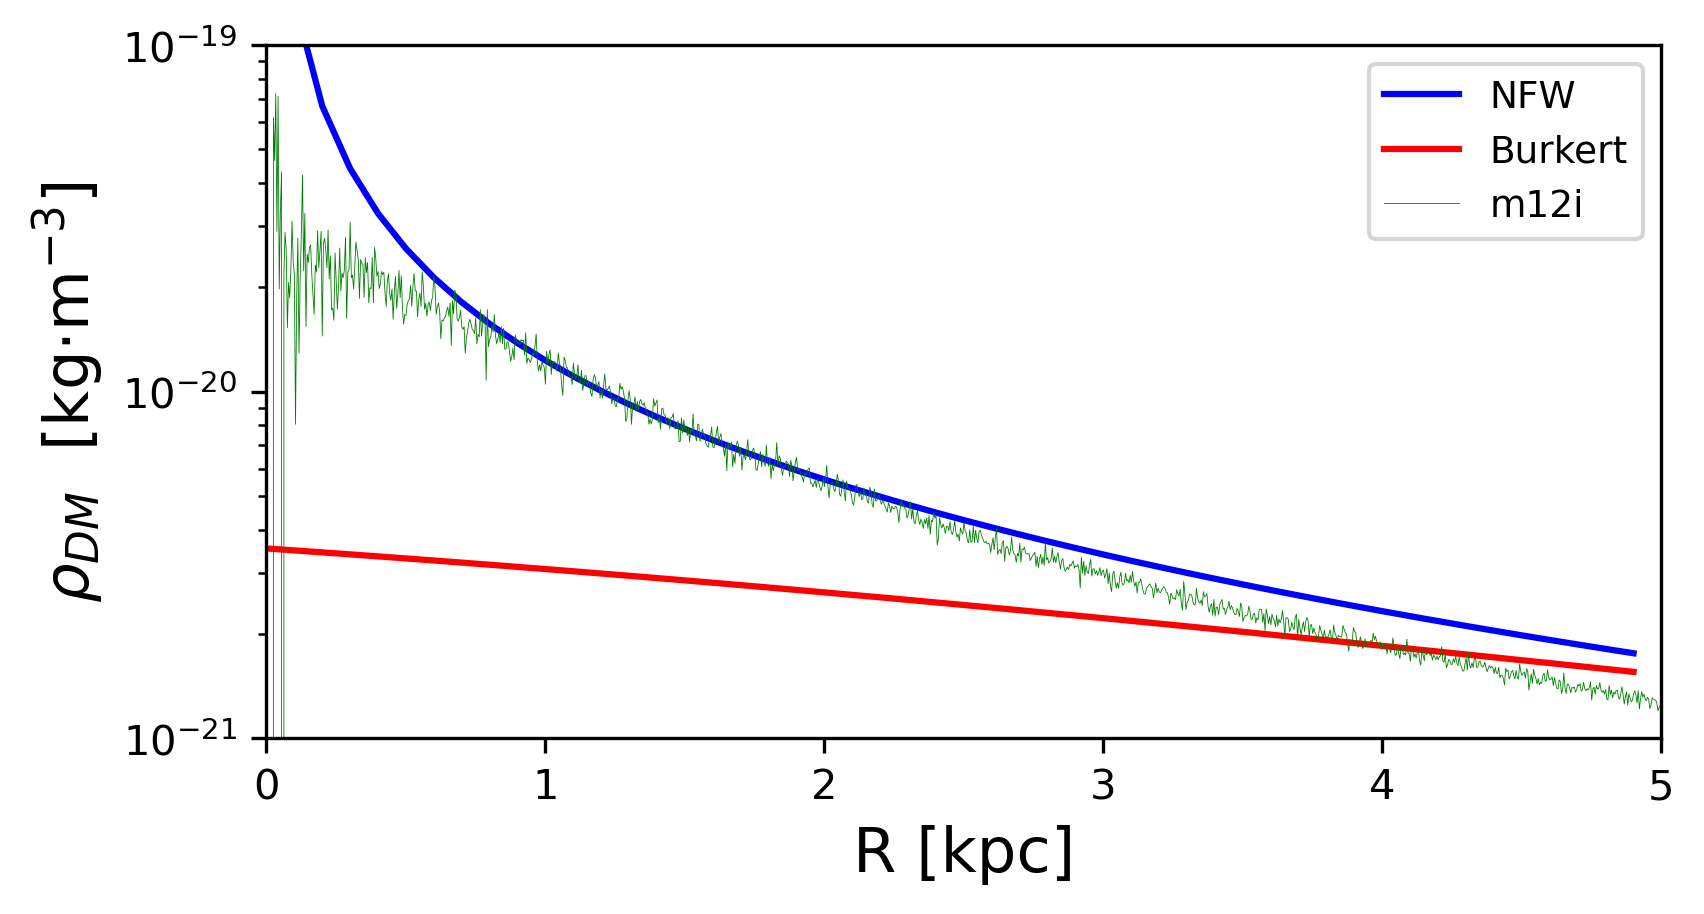

In [88]:
########### NFW Profile #############################################
dm_model_name = "NFW Profile"
rho_0h = 0.0106 * u.solMass / u.pc**3
r_h = 19.0 * u.kpc

def rho_halo_nfw(R_kpc):
    return rho_0h.to(u.kg/u.m**3) / ((R_kpc/r_h)*(1+R_kpc/r_h)**2)

def n_halo_nfw(R_none):
    return (rho_halo_nfw(R_none*u.kpc))# / m_aqn_kg).to(1/u.cm**3)
######################################################################

########### Burkert Profile #########################################
dm_model_name = "Burkert Profile"
vh = 414 * u.km / u.s
r0 = 7.8 * u.kpc
rho0 = (vh**2 / (4*np.pi * r0**2 * cst.G)).to(u.kg/u.m**3)

def rho_halo_burkert(R_kpc):
    return rho0 * r0**3 / ( (R_kpc+r0)*((R_kpc)**2 + r0**2) )

def n_halo_burkert(R_none):
    return (rho_halo_burkert(R_none*u.kpc))# / m_aqn_kg).to(1/u.cm**3)
#####################################################################

########### NFW Profile #############################################
dm_model_name = "NFW Profile With Contraction"
m200_solmass = 0.97e12 * u.solMass
r200_kpc = 218 * u.kpc
c = 9.37

m200_kg = m200_solmass.to(u.kg)
r200_cm = r200_kpc.to(u.cm)
rs_cm = r200_cm / c

def rho_halo_nfw_contracted(R_kpc):
    R_cm = R_kpc.to(u.cm)
    return (m200_kg / (4*np.pi*r200_cm**3)) * \
           (c**3 / (np.log(1+c)-c/(1+c))) * \
           (rs_cm**3 / (R_cm*(R_cm+rs_cm)**2))

def n_halo_nfw_contracted(R_none):
    return (rho_halo_nfw_contracted(R_none*u.kpc))# / m_aqn_kg).to(1/u.cm**3)
# #####################################################################


n_halo_nfw = n_halo_nfw(np.arange(0, max_distance_kpc.value, 0.1))
n_halo_burkert = n_halo_burkert(np.arange(0, max_distance_kpc.value, 0.1))
n_halo_nfw_contracted = n_halo_nfw_contracted(np.arange(0.1, max_distance_kpc.value, 0.1))



plt.figure(dpi=300, figsize=(6,3))


plt.plot(np.arange(0,max_distance_kpc.value,0.1), n_halo_nfw, label="NFW", color="blue")
plt.plot(np.arange(0,max_distance_kpc.value,0.1), n_halo_burkert, label = "Burkert", color = "red")
# plt.plot(np.arange(0.1,max_distance_kpc.value,0.1), n_halo_nfw_contracted, label = "NFW Cautun 2020", color = "green")

# plt.bar(avg_bin_distances.value, binned_dm_density_si.value, color="burlywood", alpha = 0.5, label="m12i")
# plt.bar(distance_bins[0:len(distance_bins) - 1].value, binned_dm_density_si.value, width=kpc_per_bin ,color="burlywood", alpha = 0.75, label="m12i")
plt.plot(distance_bins[0:len(distance_bins) - 1].value, binned_dm_density_si.value, color="green", linewidth=0.2, label="m12i")

plt.yscale('log')
plt.xlabel("R [kpc]", size=15)
plt.ylabel(r'$\rho_{DM}$'+"  [kg$\cdot$m$^{-3}$]", size = 15)

plt.ylim([10**(-21),10**(-19)])
plt.xlim([0,5])

# for 50 kpc
# plt.ylim([10**(-23),10**(-19)])
# plt.xlim([-1,50])


plt.legend(fontsize=9)


plt.savefig("plots/DM Models vs m12i - 5kpc - line - 1200 bins.svg", bbox_inches='tight')
plt.savefig("plots/DM Models vs m12i - 5kpc - line - 1200 bins.png", bbox_inches='tight')

plt.show()

In [91]:
# filter by distance to Galaxy
max_distance_kpc = 30 * u.kpc
within_mw = part['gas'].prop('host.distance.total') < max_distance_kpc.value

# array of distances of each particle to the host Galaxy centre
gas = part['gas'].prop('host.distance.total')[within_mw]

K_to_eV = cst.k_B.cgs*erg_to_eV



In [92]:
print(part['gas'].keys())

dict_keys(['position', 'density', 'electron.fraction', 'temperature', 'mass', 'massfraction', 'hydrogen.neutral.fraction', 'id.child', 'id.generation', 'id', 'potential', 'size', 'sfr', 'velocity'])


In [95]:
part['gas'].prop('hydrogen.neutral.fraction')

array([1.5174731e-12, 9.2492377e-12, 4.2603931e-11, ..., 1.0964594e-06,
       1.0447643e-06, 9.7761279e-07], dtype=float32)

In [179]:
# gas_density * u.Msun / u.kpc**3

In [172]:
# plt.hist(gas_density, bins = 100)

In [96]:
gas_mass = part['gas'].prop('mass') * u.Msun


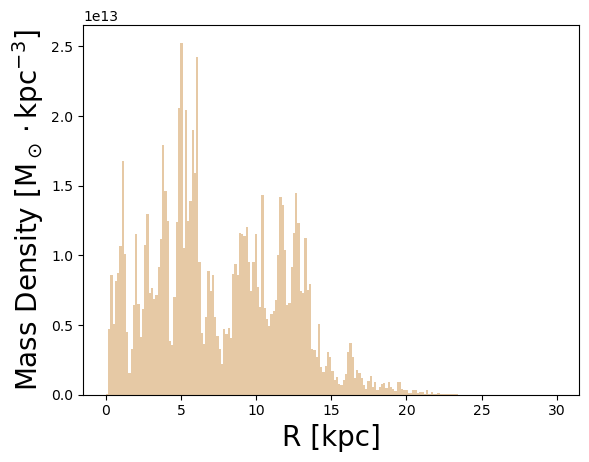

In [98]:
# try to work with the built-in gas density
gas_density = part['gas'].prop('density') * u.Msun / u.kpc**3

num_bins = 200

# create bins array
distance_bins = np.linspace(0,max_distance_kpc.value,num_bins+1,endpoint=True) * u.kpc

# bin weighing by gas density
plt.figure(dpi=100)
histogram_results = plt.hist(gas, bins=distance_bins.value, 
                                  weights=gas_density[within_mw].value, color="burlywood", alpha = 0.75)
plt.xlabel("R [kpc]", size=20)
plt.ylabel("Mass Density [M$_\odot\cdot$kpc$^{-3}$]", size=20)
# plt.savefig("plots/m12i gas mass density.png", bbox_inches='tight')
# plt.savefig("plots/m12i gas mass density.svg", bbox_inches='tight')
plt.show()

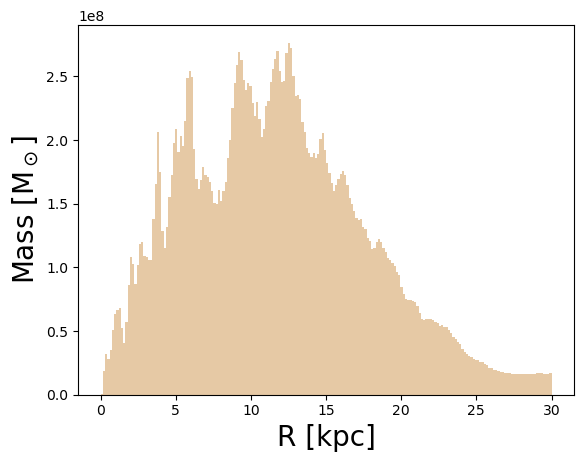

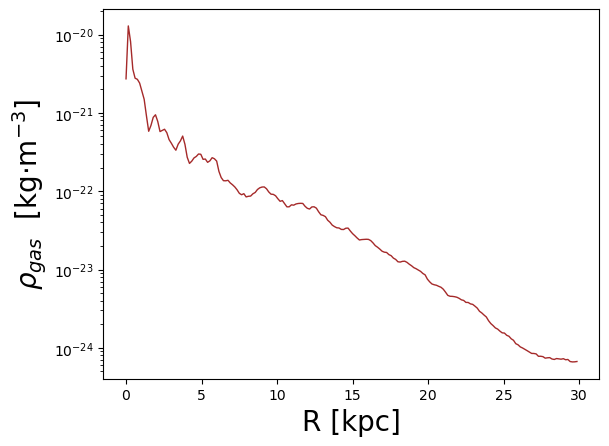

In [107]:
# follow same steps as for DM
num_bins = 200

# create bins array
distance_bins = np.linspace(0,max_distance_kpc.value,num_bins+1,endpoint=True) * u.kpc

# normalize bins
kpc_per_bin = max_distance_kpc / num_bins

# calculate spherical areas at each binned distance
# avg_bin_distances = distance_bins[0:len(distance_bins)-1] + kpc_per_bin/2
# avg_bin_areas = 4 * np.pi * avg_bin_distances**2

bin_volumes = 4/3*np.pi * (distance_bins[1:len(distance_bins)]**3 - distance_bins[0:len(distance_bins) - 1]**3)

# bin weighing by particle mass
plt.figure(dpi=100)
histogram_results = plt.hist(gas, bins=distance_bins.value, 
                                  weights=gas_mass[within_mw].value, color="burlywood", alpha = 0.75)
plt.xlabel("R [kpc]", size=20)
plt.ylabel("Mass [M$_\odot$]", size=20)
# plt.savefig("plots/m12i gas mass total.png", bbox_inches='tight')
# plt.savefig("plots/m12i gas mass total.svg", bbox_inches='tight')
plt.show()

binned_gas_density = histogram_results[0] * u.Msun / bin_volumes
binned_gas_density_si = binned_gas_density.to(u.kg/u.m**3)

plt.figure(dpi=100)
# plt.bar(distance_bins[0:len(distance_bins) - 1].value, binned_gas_density_si.value, width=kpc_per_bin ,color="burlywood", alpha = 0.75)
plt.plot(distance_bins[0:len(distance_bins) - 1].value, binned_gas_density_si.value, linewidth=1, color="brown", alpha = 1)
# plt.bar(avg_bin_distances.value, binned_gas_density_si.value, color="burlywood", alpha = 0.75)
plt.yscale('log')
plt.xlabel("R [kpc]", size=20)
plt.ylabel(r'$\rho_{gas}$'+"  [kg$\cdot$m$^{-3}$]", size = 20)
# plt.savefig("plots/m12i gas density total.png", bbox_inches='tight')
# plt.savefig("plots/m12i gas density total.svg", bbox_inches='tight')
plt.show()

# plt.hist(avg_bin_distances.value, bins=distance_bins.value, weights = binned_dm_density_si.value)
# plt.show()


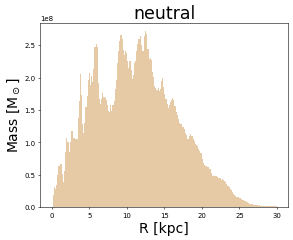

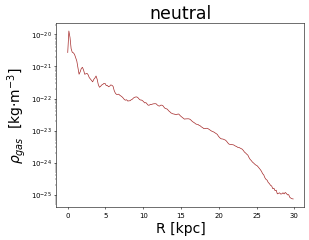

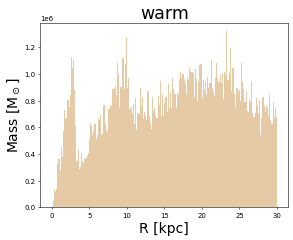

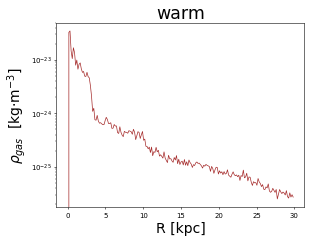

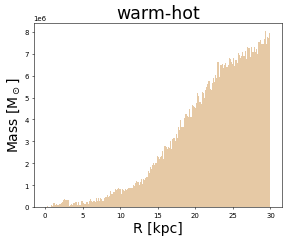

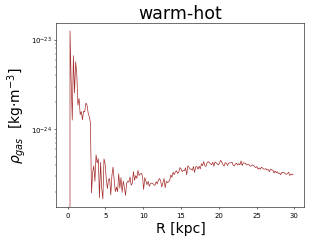

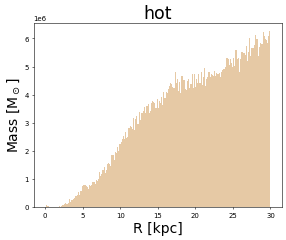

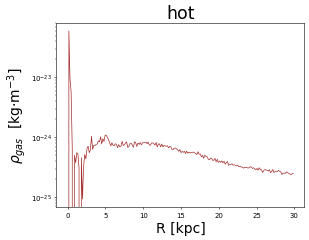

In [109]:
gas_temp = part['gas'].prop('temperature')[within_mw]


neutral_filter = gas_temp < 3e4 
warm_filter = np.logical_and(3e4 < gas_temp, gas_temp < 1e5)
warm_hot_filter = np.logical_and(1e5 < gas_temp, gas_temp < 1e6)
hot_filter = gas_temp > 1e6

def plot_gas_comp_densities(gas_filter, gas_type, gas_plot_color):
    # bin weighing by particle mass
    plt.figure(dpi=50)
    histogram_results = plt.hist(gas[gas_filter], bins=distance_bins.value, 
                                      weights=gas_mass[within_mw][gas_filter].value, color="burlywood", alpha = 0.75)
    plt.xlabel("R [kpc]", size=20)
    plt.ylabel("Mass [M$_\odot$]", size=20)
    plt.title(gas_type, size=25)
    # plt.savefig("plots/m12i gas mass " + gas_type + ".png", bbox_inches='tight')
    # plt.savefig("plots/m12i gas mass " + gas_type + ".svg", bbox_inches='tight')
    plt.show()

    binned_gas_density = histogram_results[0] * u.Msun / bin_volumes #avg_bin_areas / kpc_per_bin
    binned_gas_density_si = binned_gas_density.to(u.kg/u.m**3)
    
    plt.figure(dpi=50)
    # plt.bar(avg_bin_distances.value, binned_gas_density_si.value, color="burlywood", alpha = 0.75)
    plt.plot(distance_bins[0:len(distance_bins) - 1].value, binned_gas_density_si.value, linewidth=1, color="brown", alpha = 1)
    plt.yscale('log')
    plt.xlabel("R [kpc]", size=20)
    plt.ylabel(r'$\rho_{gas}$'+"  [kg$\cdot$m$^{-3}$]", size = 20)
    plt.title(gas_type, size=25)
    # plt.savefig("plots/m12i gas density " + gas_type + ".png", bbox_inches='tight')
    # plt.savefig("plots/m12i gas density " + gas_type + ".svg", bbox_inches='tight')
    plt.show()

plot_gas_comp_densities(neutral_filter, "neutral", "blue")
plot_gas_comp_densities(warm_filter, "warm", "green")
plot_gas_comp_densities(warm_hot_filter, "warm-hot", "red")
plot_gas_comp_densities(hot_filter, "hot", "purple")

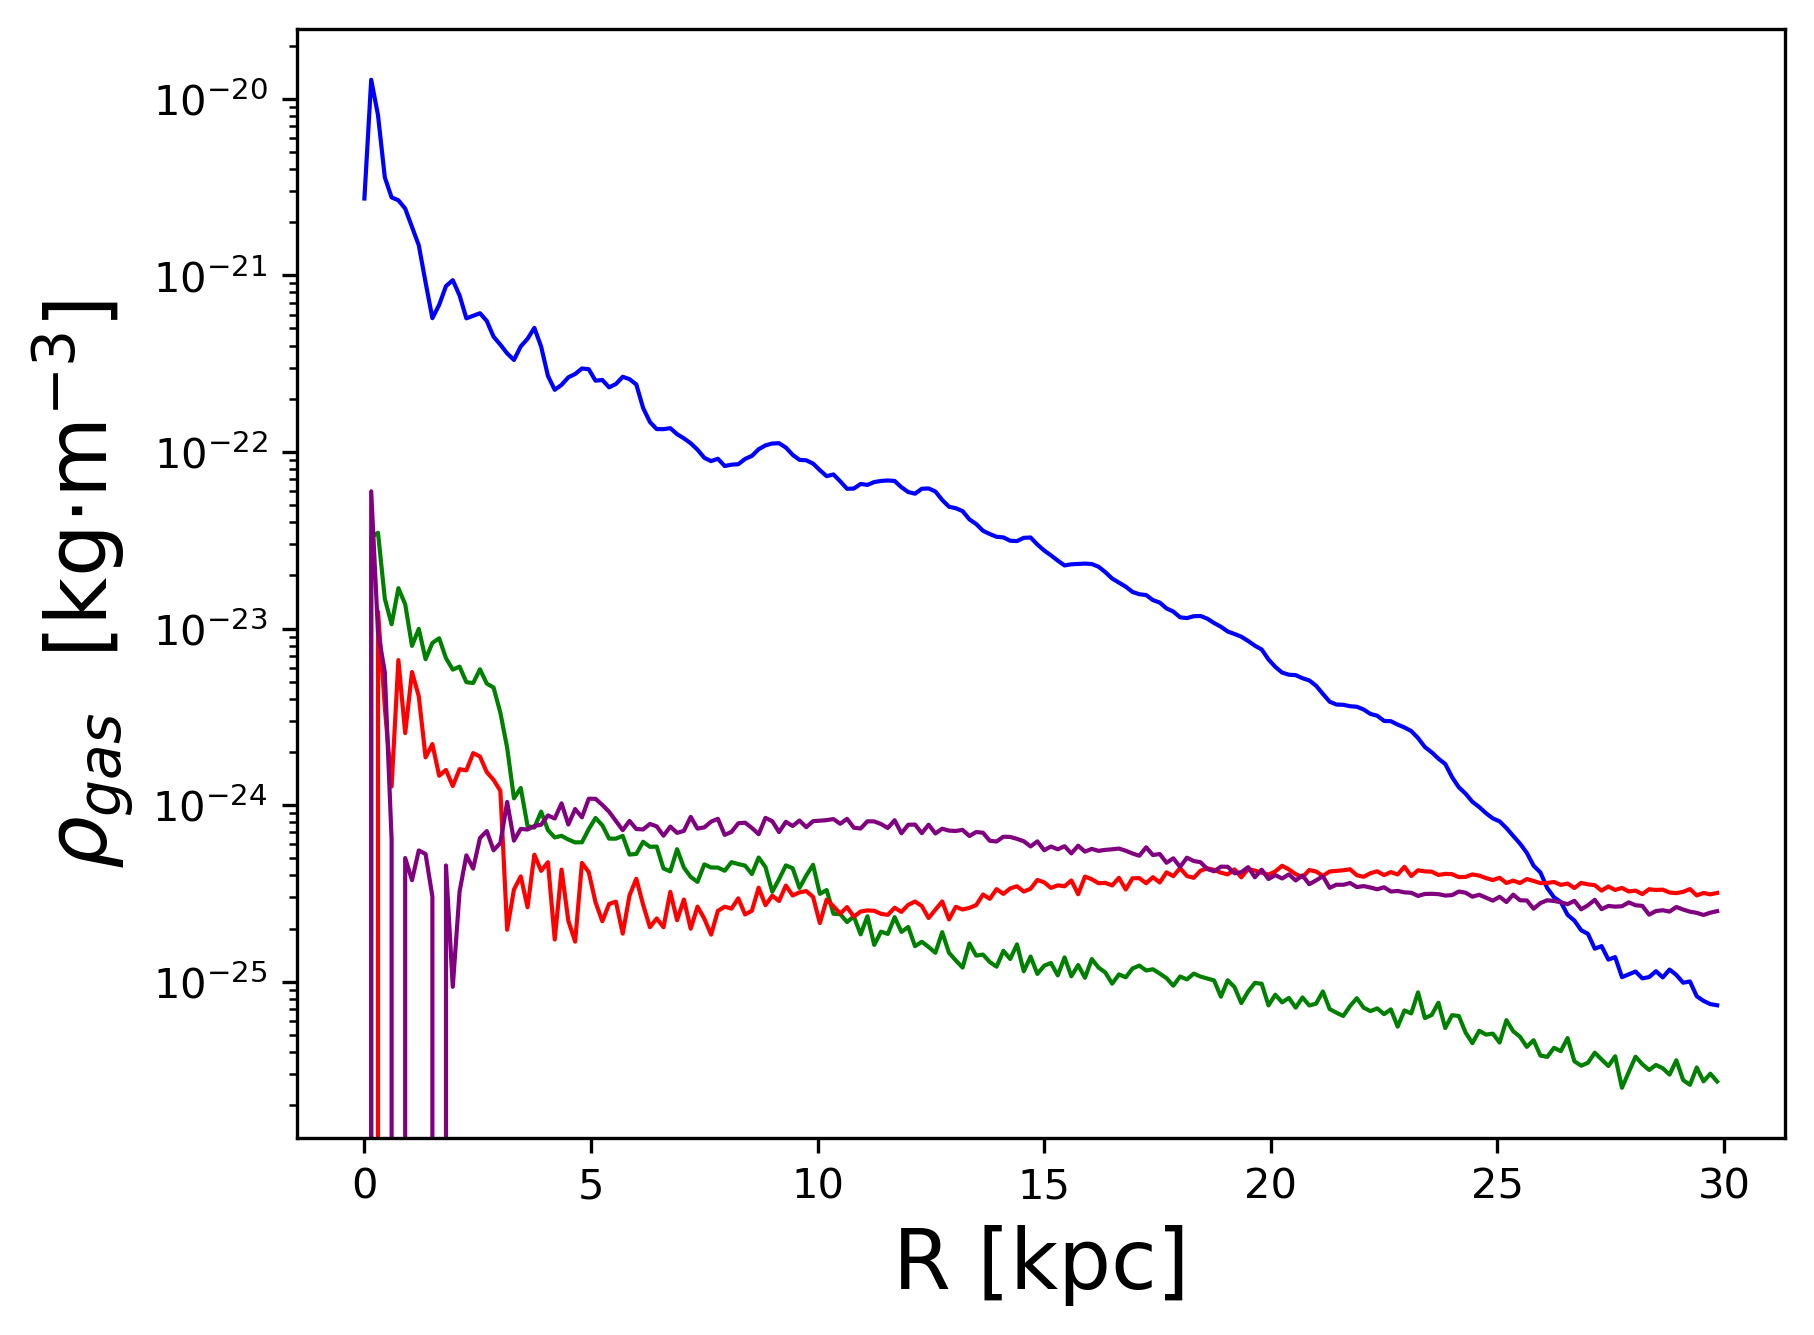

In [111]:
gas_temp = part['gas'].prop('temperature')[within_mw]


neutral_filter = gas_temp < 3e4 
warm_filter = np.logical_and(gas_temp > 3e4, gas_temp < 1e5)
warm_hot_filter = np.logical_and(1e5 < gas_temp, gas_temp < 1e6)
hot_filter = gas_temp > 1e6



def plot_gas_comp_densities(gas_filter, gas_type, gas_plot_color):
    # bin weighing by particle mass
    # plt.figure(dpi=300)
    histogram_results = plt.hist(gas[gas_filter], bins=distance_bins.value, 
                                      weights=gas_mass[within_mw][gas_filter].value, color="burlywood", alpha = 0.75)
    # plt.xlabel("R [kpc]", size=20)
    # plt.ylabel("Mass [M$_\odot$]", size=20)
    # plt.title(gas_type, size=25)
    # plt.savefig("plots/m12i gas mass " + gas_type + ".png", bbox_inches='tight')
    # plt.savefig("plots/m12i gas mass " + gas_type + ".svg", bbox_inches='tight')
    # plt.show()
    
    plt.close()

    binned_gas_density = histogram_results[0] * u.Msun / bin_volumes #avg_bin_areas / kpc_per_bin
    binned_gas_density_si = binned_gas_density.to(u.kg/u.m**3)

    return binned_gas_density_si
# plt.bar(avg_bin_distances.value, binned_gas_density_si.value, color="burlywood", alpha = 0.75)
# plt.yscale('log')
# plt.xlabel("R [kpc]", size=20)
# plt.ylabel(r'$\rho_{gas}$'+"  [kg$\cdot$m$^{-3}$]", size = 20)
# # plt.title(gas_type, size=25)
# # plt.savefig("plots/m12i gas density " + gas_type + ".png", bbox_inches='tight')
# # plt.savefig("plots/m12i gas density " + gas_type + ".svg", bbox_inches='tight')
# plt.show()

binned_gas_density_si_neutral  = plot_gas_comp_densities(neutral_filter, "neutral", "blue")
binned_gas_density_si_warm     = plot_gas_comp_densities(warm_filter, "warm", "green")
binned_gas_density_si_warm_hot = plot_gas_comp_densities(warm_hot_filter, "warm-hot", "red")
binned_gas_density_si_hot      = plot_gas_comp_densities(hot_filter, "hot", "purple")


plt.figure(dpi=300)

plt.plot(distance_bins[0:len(distance_bins) - 1].value, binned_gas_density_si_neutral.value, linewidth=1, color="blue", alpha = 1)
plt.plot(distance_bins[0:len(distance_bins) - 1].value, binned_gas_density_si_warm.value, linewidth=1, color="green", alpha = 1)
plt.plot(distance_bins[0:len(distance_bins) - 1].value, binned_gas_density_si_warm_hot.value, linewidth=1, color="red", alpha = 1)
plt.plot(distance_bins[0:len(distance_bins) - 1].value, binned_gas_density_si_hot.value, linewidth=1, color="purple", alpha = 1)

# plt.plot(avg_bin_distances.value, binned_gas_density_si_neutral.value, color="blue", alpha = 1)
# plt.plot(avg_bin_distances.value, binned_gas_density_si_warm.value, color="green", alpha = 1)
# plt.plot(avg_bin_distances.value, binned_gas_density_si_warm_hot.value, color="red", alpha = 1)
# plt.plot(avg_bin_distances.value, binned_gas_density_si_hot.value, color="purple", alpha = 1)

plt.yscale('log')
plt.xlabel("R [kpc]", size=20)
plt.ylabel(r'$\rho_{gas}$'+"  [kg$\cdot$m$^{-3}$]", size = 20)
plt.savefig("plots/m12i gas density " + "all_comps" + ".png", bbox_inches='tight')
plt.savefig("plots/m12i gas density " + "all_comps" + ".svg", bbox_inches='tight')
plt.show()


/tmp/ipykernel_241/3183599016.py:148: RuntimeWarning: divide by zero encountered in divide
  a3_c / (1+(x_exp/b3_c)**2)**c3_c + \
/tmp/ipykernel_241/3183599016.py:149: RuntimeWarning: divide by zero encountered in divide
  a4_c / (1+(x_exp/b4_c)**2)**c4_c)* rho_crit_z05_si.value, lw="1", ls="-", color="gray", zorder=10)
/tmp/ipykernel_241/3183599016.py:159: RuntimeWarning: overflow encountered in power
  a4_wh / (1+(x_exp/b4_wh)**2)**c4_wh)* rho_crit_z05_si.value, lw="1", ls="-", color="gray", zorder=10)


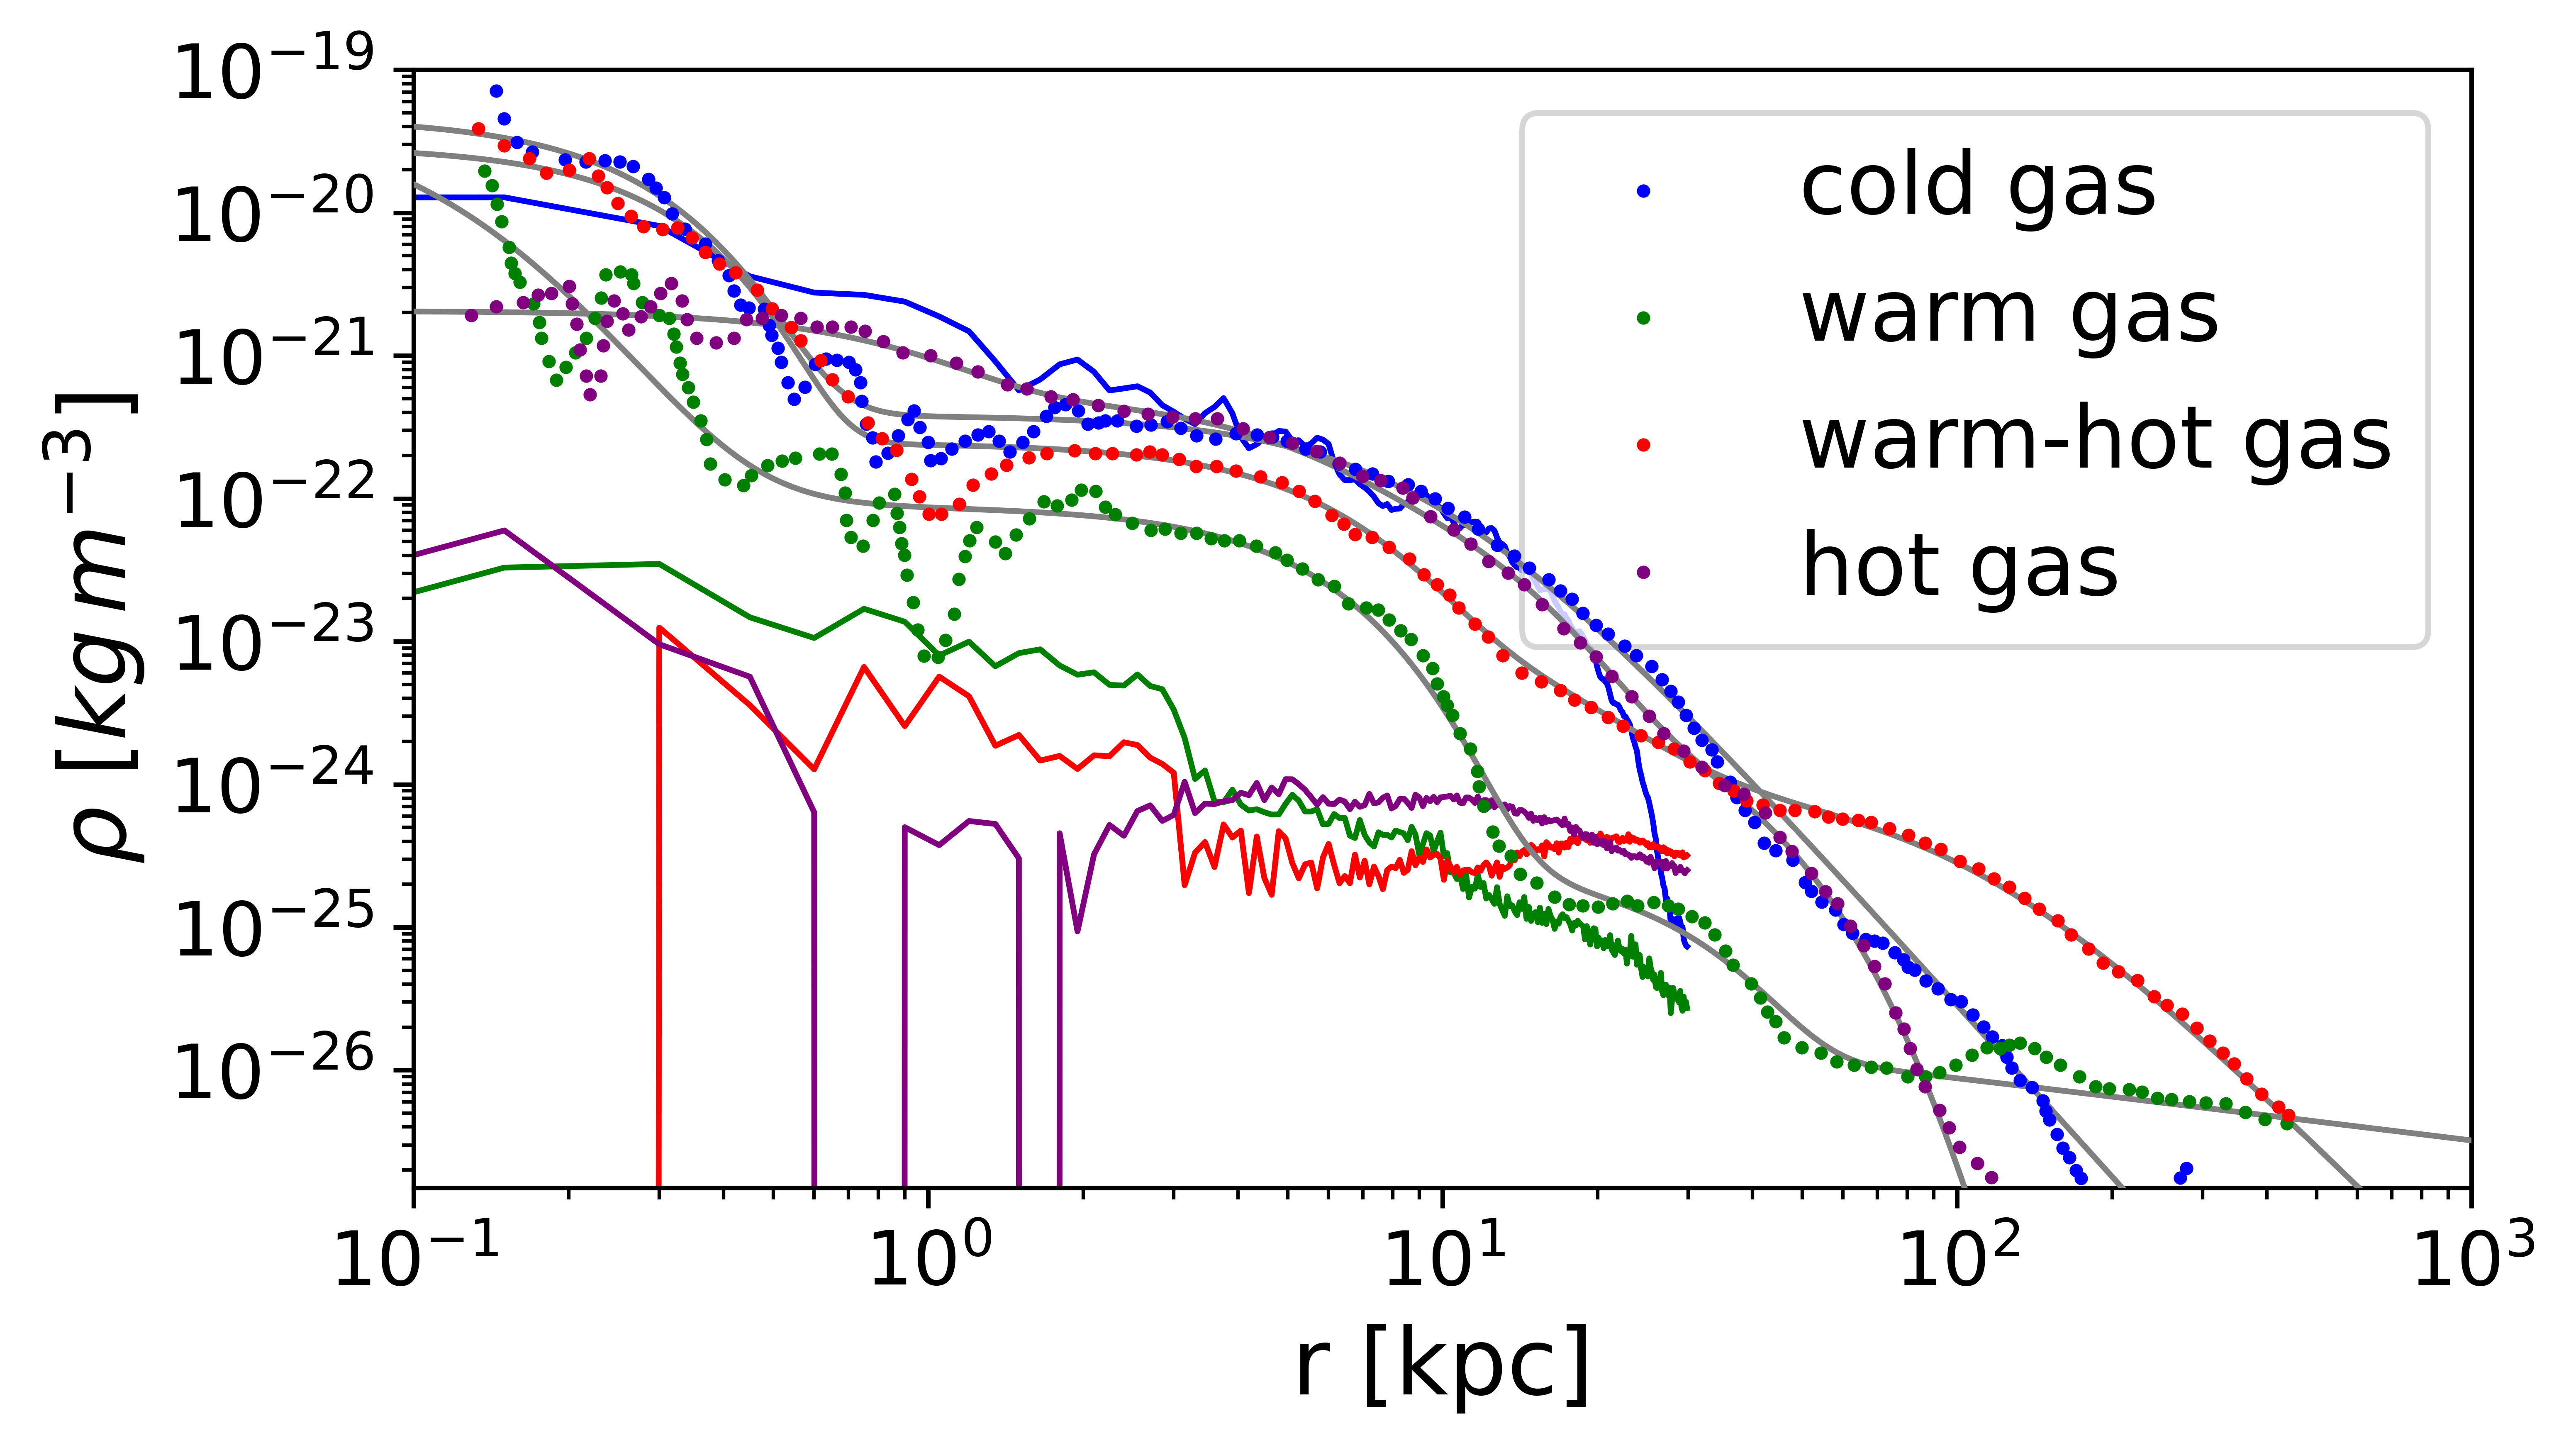

In [112]:
gas_temp = part['gas'].prop('temperature')[within_mw]


neutral_filter = gas_temp < 3e4 
warm_filter = np.logical_and(gas_temp > 3e4, gas_temp < 1e5)
warm_hot_filter = np.logical_and(1e5 < gas_temp, gas_temp < 1e6)
hot_filter = gas_temp > 1e6



def plot_gas_comp_densities(gas_filter, gas_type, gas_plot_color):
    # bin weighing by particle mass
    # plt.figure(dpi=300)
    histogram_results = plt.hist(gas[gas_filter], bins=distance_bins.value, 
                                      weights=gas_mass[within_mw][gas_filter].value, color="burlywood", alpha = 0.75)
    # plt.xlabel("R [kpc]", size=20)
    # plt.ylabel("Mass [M$_\odot$]", size=20)
    # plt.title(gas_type, size=25)
    # plt.savefig("plots/m12i gas mass " + gas_type + ".png", bbox_inches='tight')
    # plt.savefig("plots/m12i gas mass " + gas_type + ".svg", bbox_inches='tight')
    # plt.show()
    
    plt.close()

    binned_gas_density = histogram_results[0] * u.Msun / bin_volumes # avg_bin_areas / kpc_per_bin
    binned_gas_density_si = binned_gas_density.to(u.kg/u.m**3)

    return binned_gas_density_si
# plt.bar(avg_bin_distances.value, binned_gas_density_si.value, color="burlywood", alpha = 0.75)
# plt.yscale('log')
# plt.xlabel("R [kpc]", size=20)
# plt.ylabel(r'$\rho_{gas}$'+"  [kg$\cdot$m$^{-3}$]", size = 20)
# # plt.title(gas_type, size=25)
# # plt.savefig("plots/m12i gas density " + gas_type + ".png", bbox_inches='tight')
# # plt.savefig("plots/m12i gas density " + gas_type + ".svg", bbox_inches='tight')
# plt.show()

binned_gas_density_si_neutral  = plot_gas_comp_densities(neutral_filter, "neutral", "blue")
binned_gas_density_si_warm     = plot_gas_comp_densities(warm_filter, "warm", "green")
binned_gas_density_si_warm_hot = plot_gas_comp_densities(warm_hot_filter, "warm-hot", "red")
binned_gas_density_si_hot      = plot_gas_comp_densities(hot_filter, "hot", "purple")

plt.figure(figsize=(6.4, 3.5), dpi=1000)
# plt.plot(avg_bin_distances.value, binned_gas_density_si_neutral.value, color="blue", alpha = 1)
# plt.plot(avg_bin_distances.value, binned_gas_density_si_warm.value, color="green", alpha = 1)
# plt.plot(avg_bin_distances.value, binned_gas_density_si_warm_hot.value, color="red", alpha = 1)
# plt.plot(avg_bin_distances.value, binned_gas_density_si_hot.value, color="purple", alpha = 1)

plt.plot(distance_bins[0:len(distance_bins) - 1].value, binned_gas_density_si_neutral.value, linewidth=1, color="blue", alpha = 1)
plt.plot(distance_bins[0:len(distance_bins) - 1].value, binned_gas_density_si_warm.value, linewidth=1, color="green", alpha = 1)
plt.plot(distance_bins[0:len(distance_bins) - 1].value, binned_gas_density_si_warm_hot.value, linewidth=1, color="red", alpha = 1)
plt.plot(distance_bins[0:len(distance_bins) - 1].value, binned_gas_density_si_hot.value, linewidth=1, color="purple", alpha = 1)







from astropy.cosmology import WMAP7             # WMAP 7-year cosmology
rho_crit_z05_cgs = WMAP7.critical_density(0.5)  # critical density at z = 0.5  
rho_crit_z05_si = rho_crit_z05_cgs.to(u.kg / u.m**3)
r_vir_kpc = 233 * u.kpc



[a1_c, b1_c, c1_c, 
 a2_c, b2_c, c2_c, 
 a3_c, b3_c, c3_c, 
 a4_c, b4_c, c4_c, 
 a5_c, b5_c, c5_c, 
 a6_c, b6_c, c6_c] = [3e6, 4e-3,  13,  
                      2.5e4,  4e-2,  2,  
                      0,0,0,
                      0,0,0,
                      0,0,0,
                      0,0,0,]

[a1_w, b1_w, c1_w, 
 a2_w, b2_w, c2_w, 
 a3_w, b3_w, c3_w, 
 a4_w, b4_w, c4_w, 
 a5_w, b5_w, c5_w, 
 a6_w, b6_w, c6_w] = [
                1.1e0,1e-1,0.22,
              1.7e1,12e-1,110,
              0.575e4,8.2e-2,13.7,
             3e6,6e-4,2.6,
             0,0,0,
             0,0,0,]

[a1_wh, b1_wh, c1_wh, 
 a2_wh, b2_wh, c2_wh, 
 a3_wh, b3_wh, c3_wh, 
 a4_wh, b4_wh, c4_wh, 
 a5_wh, b5_wh, c5_wh, 
 a6_wh, b6_wh, c6_wh] = [6.1e1,4.4e-1,1.8,
              9e2,9.2e-2,2.8,
              1.5e4,7e-2,9,
                1.9e6,7e-2,3.1e3,
             0,0,0,
             0,0,0,]

[a1_h, b1_h, c1_h, 
 a2_h, b2_h, c2_h, 
 a3_h, b3_h, c3_h, 
 a4_h, b4_h, c4_h, 
 a5_h, b5_h, c5_h, 
 a6_h, b6_h, c6_h] = [2e2,4e-1,9.5,
              1e4,10e-2,6,
              2.4e4,6e-2,10,
              1e5,1.2e-2,10,
              0,0,0,
              0,0,0,]






import csv
def plotting_function(filename, gas_type, color, A=0, B=0):
    with open(filename, mode='r') as file:
        reader = csv.reader(file, delimiter=",")
        next(reader)
        x = []
        y = []
        for r in reader:
            #print(r[4],r[5],r[6])
            #led_positions.setdefault(r[0],{}).update({r[1]: np.array([r[2], r[3]]).astype(float)})
            x.append(float(r[5]))
            y.append(float(r[6]))
    x = np.array(x)
    y = np.array(y)

    xdata = 10**x
    ydata = 10**y

    plt.scatter(xdata*r_vir_kpc.value, ydata*rho_crit_z05_si.value, s=7,marker=".",color=color,label=gas_type + " gas", zorder=20)



x = np.arange(-3.5,1,0.01)
x_exp = 10**(x)
# plt.plot(x_exp,A * (x_exp)**B, label="0th order excel fit")
plt.plot(x_exp*r_vir_kpc.value, (a1_c / (1+(x_exp/b1_c)**2)**c1_c + \
                 a2_c / (1+(x_exp/b2_c)**2)**c2_c + \
                 a3_c / (1+(x_exp/b3_c)**2)**c3_c + \
                 a4_c / (1+(x_exp/b4_c)**2)**c4_c)* rho_crit_z05_si.value, lw="1", ls="-", color="gray", zorder=10)

plt.plot(x_exp*r_vir_kpc.value,  (a1_w / (1+(x_exp/b1_w)**2)**c1_w + \
                 a2_w / (1+(x_exp/b2_w)**2)**c2_w + \
                 a3_w / (1+(x_exp/b3_w)**2)**c3_w + \
                 a4_w / (1+(x_exp/b4_w)**2)**c4_w)* rho_crit_z05_si.value, lw="1", ls="-", color="gray", zorder=10)

plt.plot(x_exp*r_vir_kpc.value,  (a1_wh / (1+(x_exp/b1_wh)**2)**c1_wh + \
                 a2_wh / (1+(x_exp/b2_wh)**2)**c2_wh + \
                 a3_wh / (1+(x_exp/b3_wh)**2)**c3_wh + \
                 a4_wh / (1+(x_exp/b4_wh)**2)**c4_wh)* rho_crit_z05_si.value, lw="1", ls="-", color="gray", zorder=10)

plt.plot(x_exp*r_vir_kpc.value,  (a1_h / (1+(x_exp/b1_h)**2)**c1_h + \
                 a2_h / (1+(x_exp/b2_h)**2)**c2_h + \
                 a3_h / (1+(x_exp/b3_h)**2)**c3_h + \
                 a4_h / (1+(x_exp/b4_h)**2)**c4_h)* rho_crit_z05_si.value, lw="1", ls="-", color="gray", zorder=10)




plotting_function("E2K_Gas_Cold.csv", "cold", "blue", 0, 0)
plotting_function("E2K_Gas_Warm.csv", "warm", "green", 0, 0)
plotting_function("E2K_Gas_Warm_Hot.csv", "warm-hot", "red", 0, 0)
plotting_function("E2K_Gas_Hot.csv", "hot", "purple", 0, 0)


# plt.plot([r_min_kpc.value,r_min_kpc.value],[10e-30,10e-19], "--", label="r$_{min}$", color="gray")


# def power_law_fit(x, A, B):
#     return A * x**B
# x = np.arange(-3.5,1,0.01)
# x_exp = 10**x
# plt.plot(x_exp,power_law_fit(x_exp, *parameters), label="0th order scipy fit")


plt.yscale('log')
plt.xscale('log')

plt.ylim([1.5e-27,1e-19])
plt.xlim([1e-1,1e3])
plt.xlabel(r'r [kpc]',size=16)
plt.ylabel(r'$\rho$ $[kg\,m^{-3}]$',size=16)
plt.xticks(size=13)
plt.yticks(size=13)
plt.legend(fontsize=15)














# plt.yscale('log')
# plt.xlabel("R [kpc]", size=20)
# plt.ylabel(r'$\rho_{gas}$'+"  [kg$\cdot$m$^{-3}$]", size = 20)
# plt.savefig("plots/m12i gas density vs e2k.png", bbox_inches='tight')
# plt.savefig("plots/m12i gas density vs e2k.svg", bbox_inches='tight')
plt.show()


In [114]:
gas_coords = part['gas'].prop('host.distance')
within_mw = part['gas'].prop('host.distance.total') < 80
gas_temp = part['gas'].prop('temperature')
# gas_coords[within_mw]

array([[  7.39381044,  -0.53666472,  -4.27986801],
       [  7.2581105 ,  -0.43610803,  -4.16522068],
       [  7.14635365,  -0.40680307,  -4.29765417],
       ...,
       [-38.09577975, -43.57499613, -25.72908276],
       [-37.32779292, -42.7029439 , -24.8927872 ],
       [-36.34306328, -43.21643325, -24.00000174]])

In [135]:
# np.where(gas_temp>10)

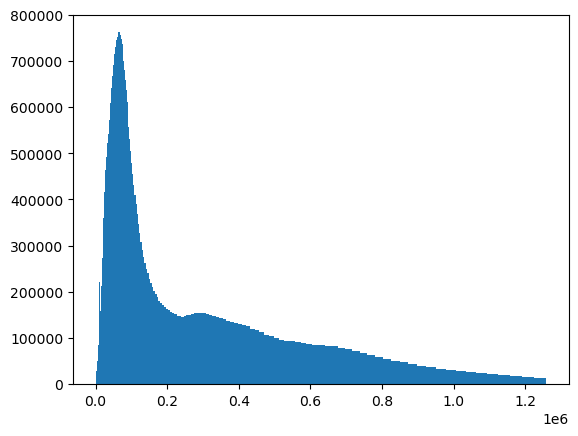

In [146]:
plt.hist(gas_temp, bins=np.logspace(0,6.1,500))
plt.show()

Text(0.5, 1.0, 'Gas Temperature Distribution')

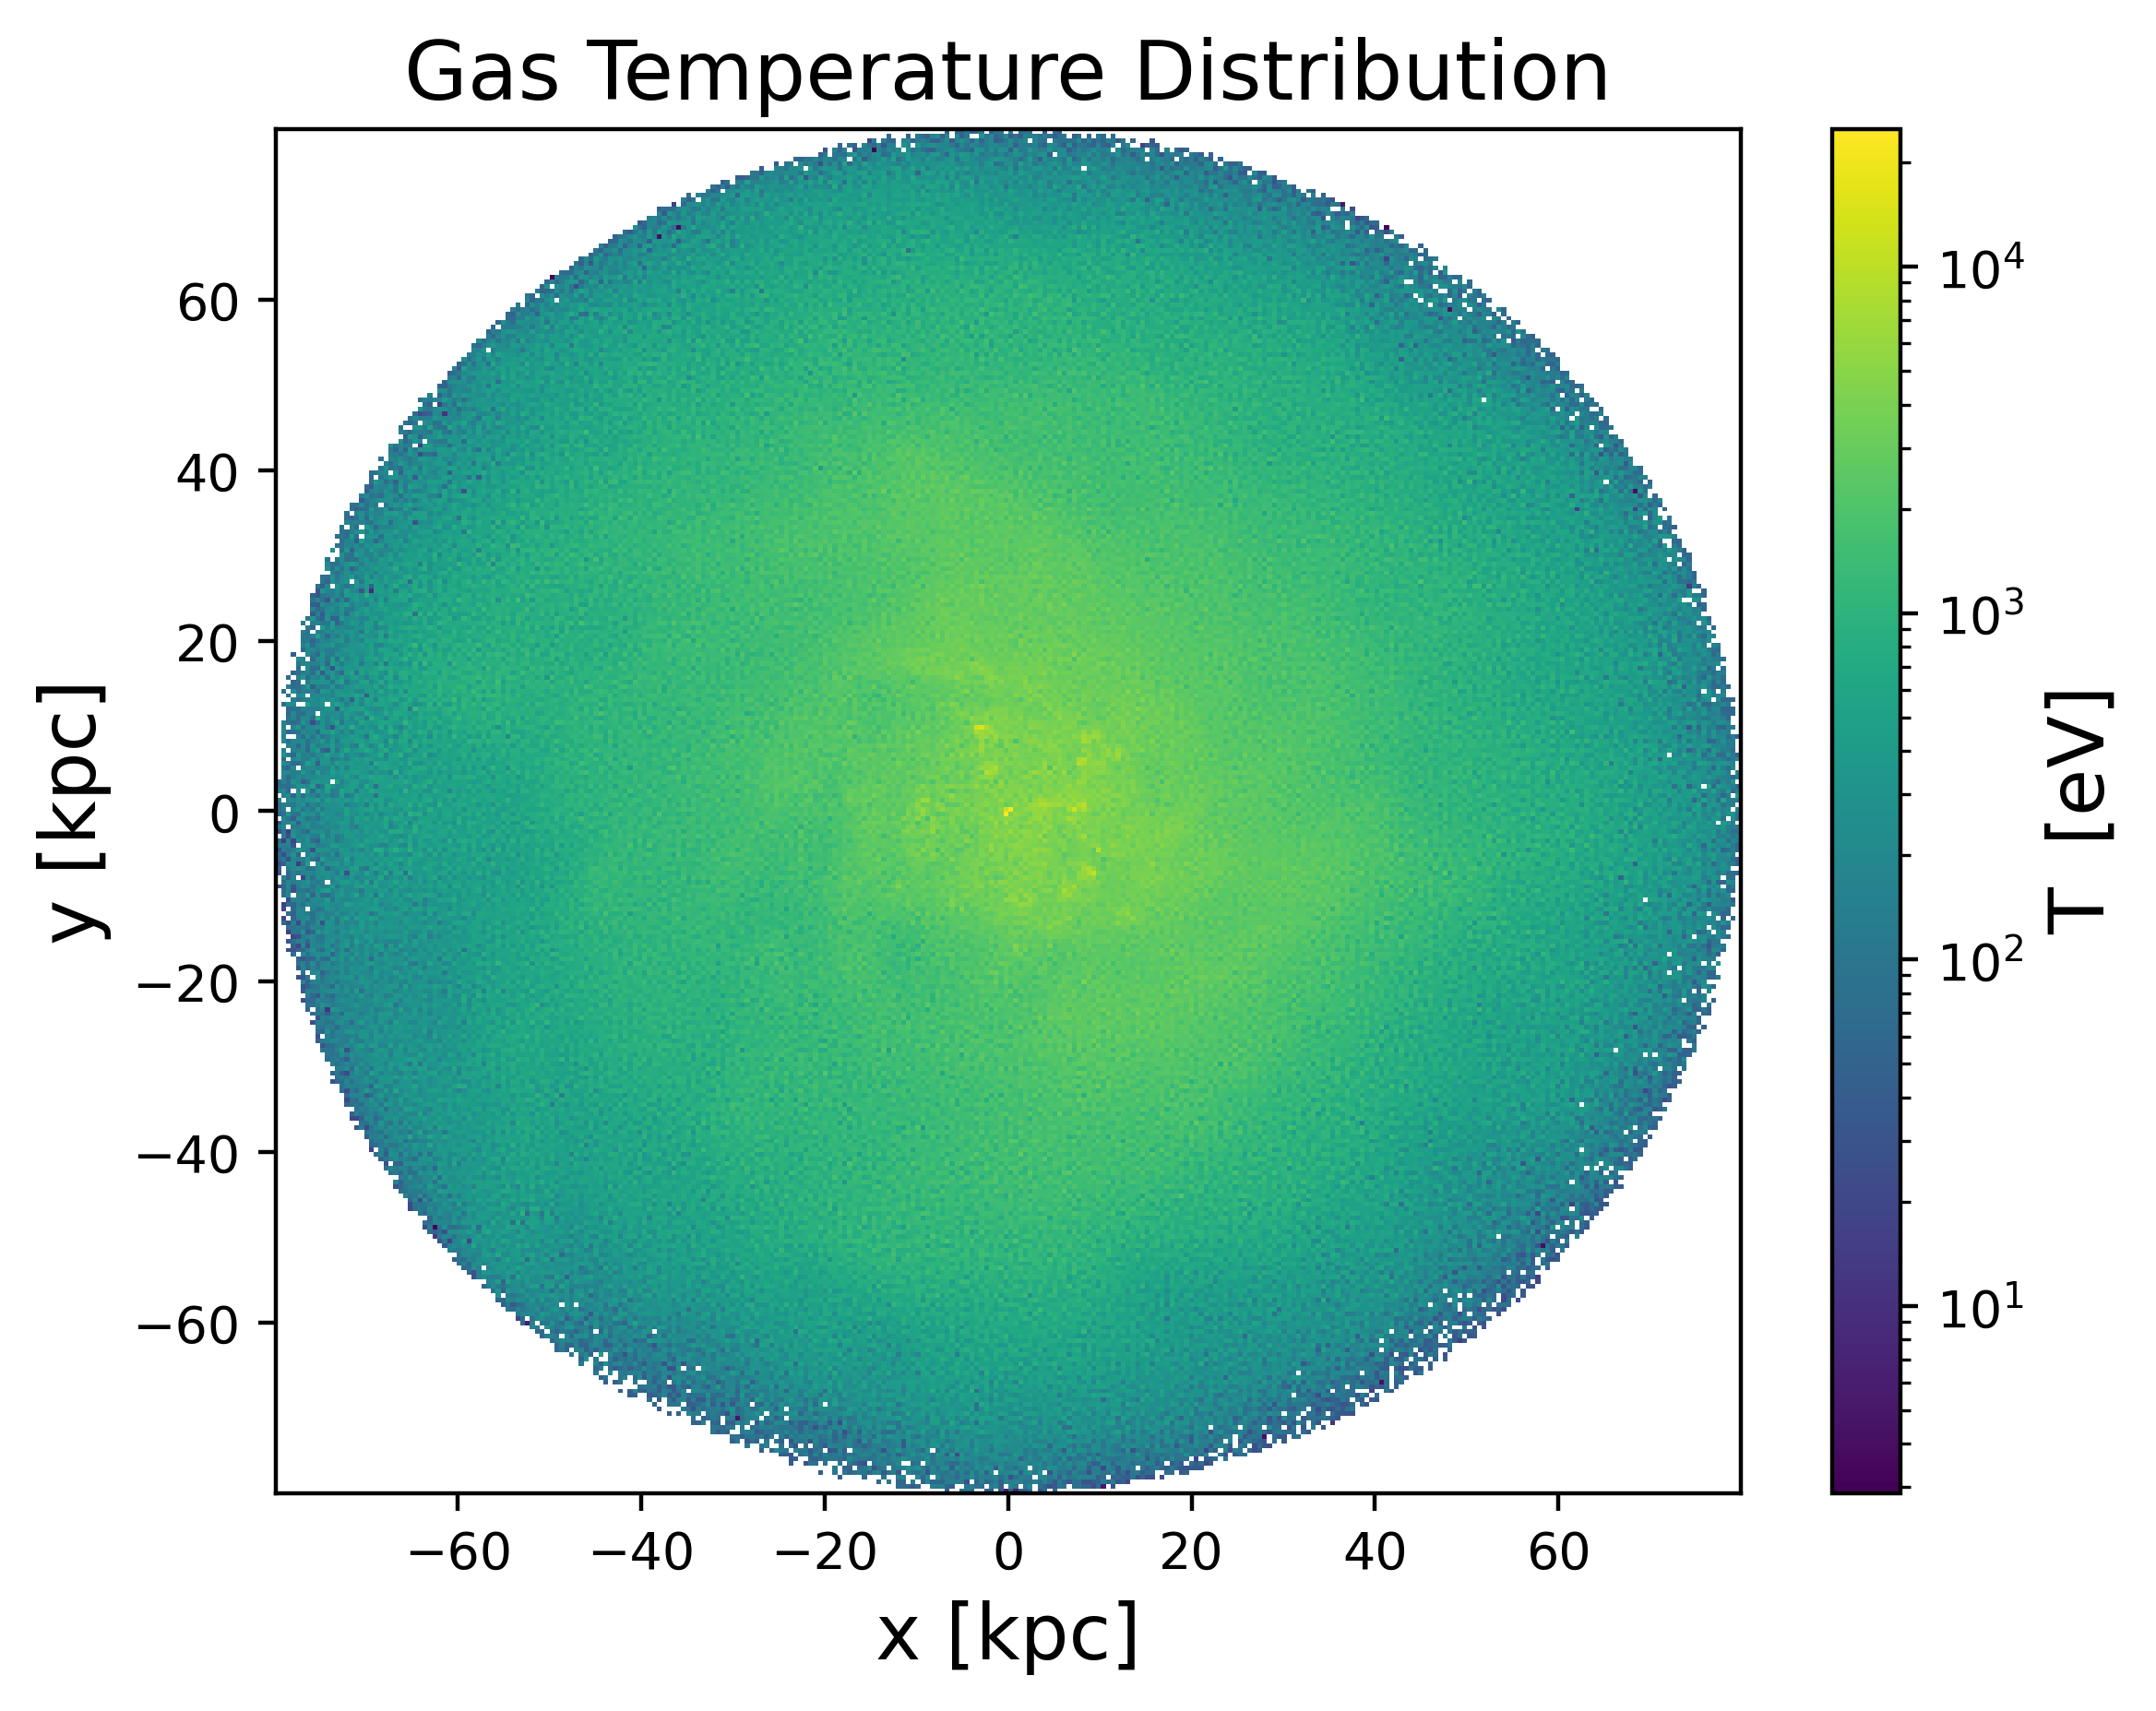

In [123]:
fig = plt.figure(dpi=400)
ax = plt.gca()

histo = ax.hist2d(gas_coords[:,0][within_mw],
         gas_coords[:,1][within_mw],
         bins = 300,
         norm = matplotlib.colors.LogNorm(),
         weights=part['gas']['temperature'][within_mw] / 11606)

cbar = fig.colorbar(histo[3], ax=ax)


cbar.set_label(r'$\mathrm{T} \;\; \mathrm{[eV]}$', size=15)  # Add the label to the colorbar

ax.set_xlabel("x [kpc]",size=15)
ax.set_ylabel("y [kpc]",size=15)
ax.set_title("Gas Temperature Distribution", size=16)

Text(0.5, 1.0, 'Gas Temperature Distribution')

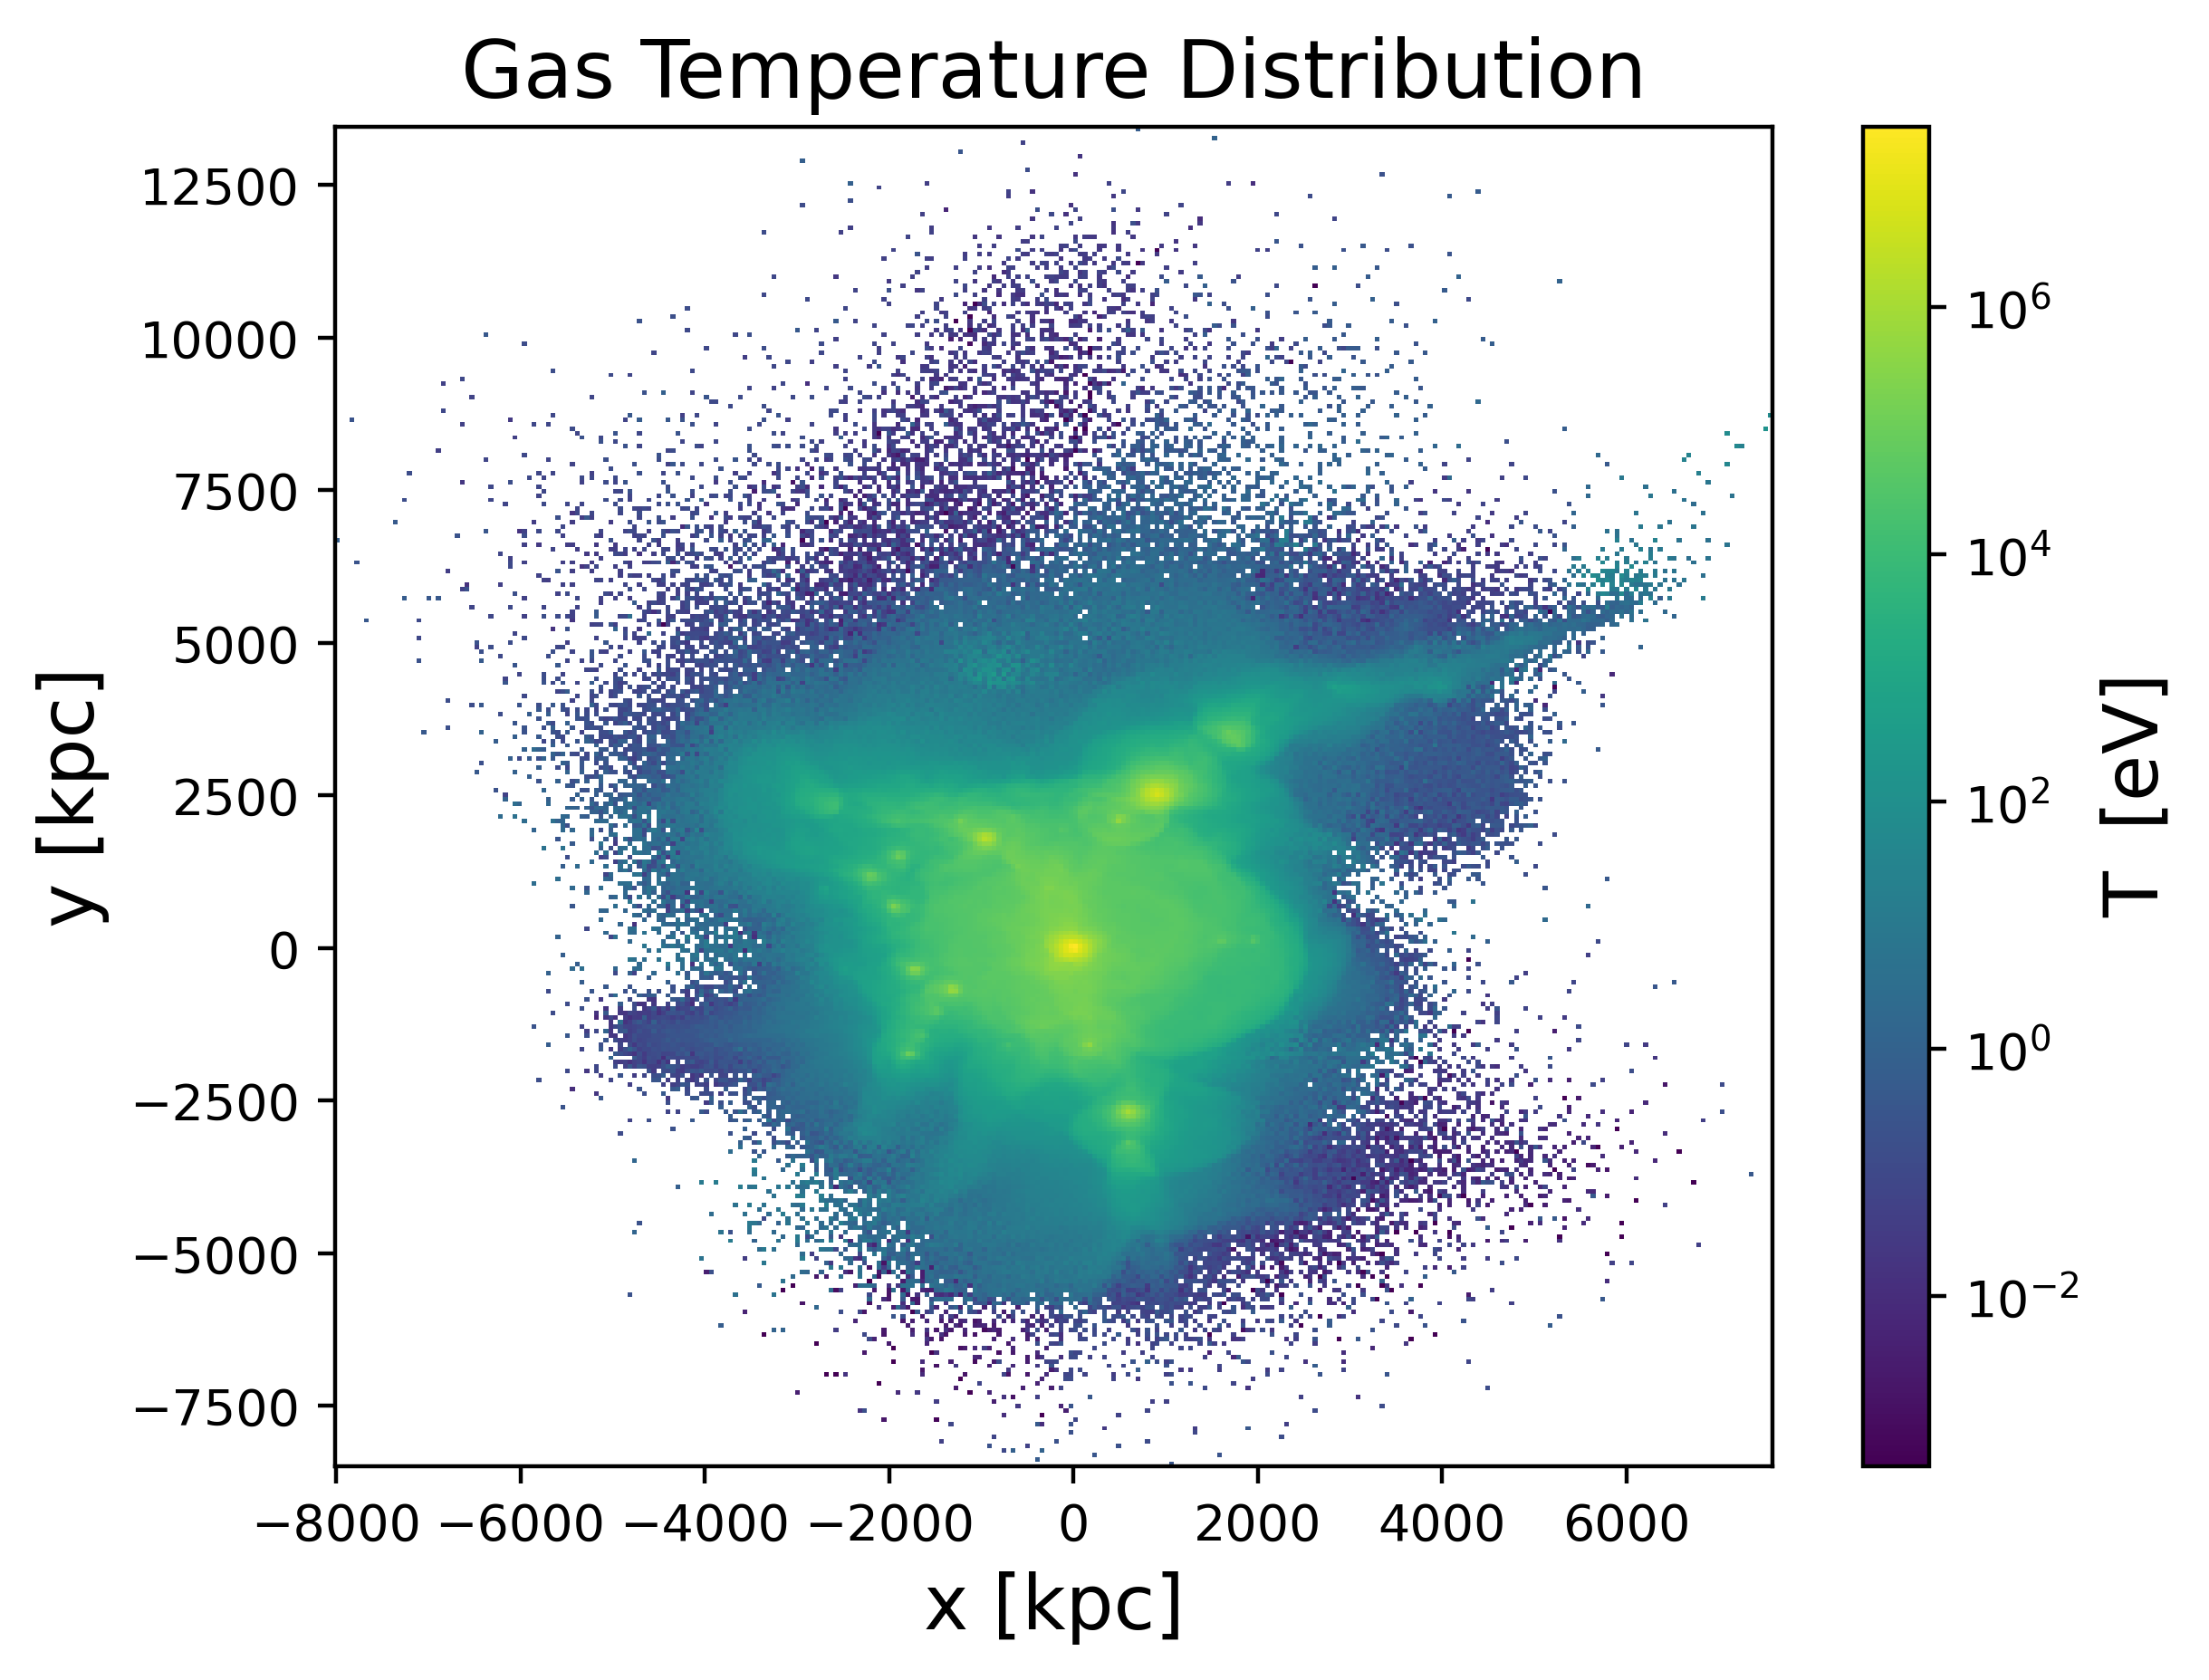

In [147]:
fig = plt.figure(dpi=400)
ax = plt.gca()

histo = ax.hist2d(gas_coords[:,0],
         gas_coords[:,1],
         bins = 300,
         norm = matplotlib.colors.LogNorm(),
         weights=part['gas']['temperature'] / 11606)

cbar = fig.colorbar(histo[3], ax=ax)


cbar.set_label(r'$\mathrm{T} \;\; \mathrm{[eV]}$', size=15)  # Add the label to the colorbar

ax.set_xlabel("x [kpc]",size=15)
ax.set_ylabel("y [kpc]",size=15)
ax.set_title("Gas Temperature Distribution", size=16)